### 4월 자치구 별 이동인구 분석
[데이터 소개]
* 서울 시 구별 이동 2024년 4월 데이터
* https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do

[변수]
* 도착시간 : 0 -> "0:00~0:59"를 의미
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

In [ ]:
#구글 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

- 4월 자치구 별 유동인구 분석

  * 폴더안에 데이터 열어서 병합

In [ ]:
import os

path = '/content/drive/MyDrive/seoul_bus/생활이동_자치구_202404/'
file_list = os.listdir(path)
file_list

['생활이동_자치구_2024.04_13시.csv',
 '생활이동_자치구_2024.04_17시.csv',
 '생활이동_자치구_2024.04_03시.csv',
 '생활이동_자치구_2024.04_02시.csv',
 '생활이동_자치구_2024.04_20시.csv',
 '생활이동_자치구_2024.04_16시.csv',
 '생활이동_자치구_2024.04_19시.csv',
 '생활이동_자치구_2024.04_18시.csv',
 '생활이동_자치구_2024.04_21시.csv',
 '생활이동_자치구_2024.04_22시.csv',
 '생활이동_자치구_2024.04_23시.csv',
 '생활이동_자치구_2024.04_05시.csv',
 '생활이동_자치구_2024.04_09시.csv',
 '생활이동_자치구_2024.04_01시.csv',
 '생활이동_자치구_2024.04_11시.csv',
 '생활이동_자치구_2024.04_08시.csv',
 '생활이동_자치구_2024.04_12시.csv',
 '생활이동_자치구_2024.04_00시.csv',
 '생활이동_자치구_2024.04_04시.csv',
 '생활이동_자치구_2024.04_10시.csv',
 '생활이동_자치구_2024.04_07시.csv',
 '생활이동_자치구_2024.04_14시.csv',
 '생활이동_자치구_2024.04_15시.csv',
 '생활이동_자치구_2024.04_06시.csv']

In [ ]:
seoul_moving = pd.DataFrame()

for i in file_list:
  data = pd.read_csv(path + i, encoding = 'cp949')
  seoul_moving = pd.concat([seoul_moving, data])

seoul_moving = seoul_moving.reset_index(drop = True)

  * 병합한 이동인구 데이터 확인하기

In [ ]:
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202404,일,13,11010,11010,F,0,EE,35,2153.27
1,202404,일,13,11010,11010,F,0,EH,8,55.91
2,202404,일,13,11010,11010,F,0,HE,55,422.22
3,202404,일,13,11010,11010,F,0,HH,49,110.49
4,202404,일,13,11010,11010,F,0,HW,55,139.42


In [ ]:
seoul_moving.tail()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
30638575,202404,토,6,38000,11250,M,30,EE,446,*
30638576,202404,토,6,39000,11060,M,30,HE,22,*
30638577,202404,토,6,39000,11080,M,50,EE,842,3.30
30638578,202404,토,6,39000,11160,F,60,EE,616,3.79
30638579,202404,토,6,39000,11250,M,75,EH,619,5.95


In [ ]:
print(seoul_moving.shape)
print('*' * 50)
seoul_moving.info()

(30638580, 10)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30638580 entries, 0 to 30638579
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.3+ GB


In [ ]:
seoul_moving.isnull().sum()

대상연월           0
요일             0
도착시간           0
출발 시군구 코드      0
도착 시군구 코드      0
성별             0
나이             0
이동유형           0
평균 이동 시간(분)    0
이동인구(합)        0
dtype: int64

In [ ]:
seoul_moving.describe().T

,count,mean,std,min,25%,50%,75%,max
대상연월,30638580.0,202404.000000,0.000000,202404.0,202404.0,202404.0,202404.0,202404.0
도착시간,30638580.0,13.638779,5.865142,0.0,10.0,14.0,18.0,23.0
출발 시군구 코드,30638580.0,17180.233258,9061.896171,11010.0,11100.0,11200.0,31014.0,39000.0
도착 시군구 코드,30638580.0,17246.134986,9071.363966,11010.0,11110.0,11200.0,31021.0,39000.0
나이,30638580.0,43.312962,18.120001,0.0,30.0,45.0,60.0,80.0
평균 이동 시간(분),30638580.0,95.123480,78.263648,1.0,50.0,76.0,114.0,5710.0


 - 기초통계량 확인

In [ ]:
seoul_moving['이동인구(합)'].value_counts()

이동인구(합)
*          3908037
6.05        455762
3.30        408505
3.29        291491
3.31        235278
            ...   
943.66           1
2906.96          1
958.49           1
1832.28          1
981.98           1
Name: count, Length: 152175, dtype: int64

 - *은 3명이하 -> 이동인구(합)의 최빈값 or 평균을 알 수 없음 (type이 string이라서) -> 중위값 1.5로 대체

In [ ]:
seoul_moving = seoul_moving.replace({'이동인구(합)':'*'}, 1.5)

In [ ]:
# 데이터타입 변경
seoul_moving['이동인구(합)'] = seoul_moving['이동인구(합)'].astype(float)

In [ ]:
seoul_moving['이동인구(합)'].value_counts()

이동인구(합)
1.50       3908037
6.05        455762
3.30        408505
3.29        291491
3.31        235278
            ...   
943.66           1
2906.96          1
958.49           1
1832.28          1
981.98           1
Name: count, Length: 152175, dtype: int64

In [ ]:
col_list = seoul_moving.select_dtypes(include = 'object').columns
col_list = list(col_list)

In [ ]:
for i in col_list:
  display(seoul_moving[i].value_counts())

요일
화    4629715
월    4518848
토    4504977
금    4471998
수    4232773
목    4219589
일    4060680
Name: count, dtype: int64

성별
M    17081708
F    13556872
Name: count, dtype: int64

이동유형
EH    6056158
HE    5804957
EE    5477759
WH    3202040
WE    3016159
HW    2796181
EW    2492660
WW    1124787
HH     667879
Name: count, dtype: int64

#### 서울지역의 데이터만 추출

 - Raw Data는 서울시에서의 이동 뿐 아니라 서울에서 나가거나 들어오는것도 포함
 - 서울시 데이터만 필요하므로 출발 시군구 코드 와 도착 시군구 코드가 서울지역인것만 추출
 - 시군구 코드:광역시도(2자리)+시군구(3자리) / 서울:11, 부산:26, 대구:27, 인천:28, 광주:29, 대전:30, 울산:31)

In [ ]:
seoul_location = seoul_moving.loc[(seoul_moving['출발 시군구 코드'] < 20000) & (seoul_moving['도착 시군구 코드'] < 20000)]
seoul_location['출발 시군구 코드'].value_counts()

출발 시군구 코드
11230    585998
11020    530341
11220    526407
11010    521742
11190    516955
11140    509550
11240    482843
11040    482635
11060    479725
11080    471369
11030    471085
11130    451744
11050    449838
11200    444340
11210    433496
11110    421693
11160    419852
11170    404944
11070    382936
11250    374489
11120    366460
11090    360504
11150    354231
11100    319949
11180    303033
Name: count, dtype: int64

 ** 서울 구별 코드 **

```
11010,종로구
11020,중구
11030,용산구
11040,성동구
11050,광진구
11060,동대문구
11070,중랑구
11080,성북구
11090,강북구
11100,도봉구
11110,노원구
11120,은평구
11130,서대문구
11140,마포구
11150,양천구
11160,강서구
11170,구로구
11180,금천구
11190,영등포구
11200,동작구
11210,관악구
11220,서초구
11230,강남구
11240,송파구
11250,강동구
```


In [ ]:
# 자치구 번호를 구 이름으로 대체
seoul_location['출발 시군구 코드'] = seoul_location['출발 시군구 코드'].map({
  11010:'종로구',
  11020:'중구',
  11030:'용산구',
  11040:'성동구',
  11050:'광진구',
  11060:'동대문구',
  11070:'중랑구',
  11080:'성북구',
  11090:'강북구',
  11100:'도봉구',
  11110:'노원구',
  11120:'은평구',
  11130:'서대문구',
  11140:'마포구',
  11150:'양천구',
  11160:'강서구',
  11170:'구로구',
  11180:'금천구',
  11190:'영등포구',
  11200:'동작구',
  11210:'관악구',
  11220:'서초구',
  11230:'강남구',
  11240:'송파구',
  11250:'강동구',
})

seoul_location['도착 시군구 코드'] = seoul_location['도착 시군구 코드'].map({
  11010:'종로구',
  11020:'중구',
  11030:'용산구',
  11040:'성동구',
  11050:'광진구',
  11060:'동대문구',
  11070:'중랑구',
  11080:'성북구',
  11090:'강북구',
  11100:'도봉구',
  11110:'노원구',
  11120:'은평구',
  11130:'서대문구',
  11140:'마포구',
  11150:'양천구',
  11160:'강서구',
  11170:'구로구',
  11180:'금천구',
  11190:'영등포구',
  11200:'동작구',
  11210:'관악구',
  11220:'서초구',
  11230:'강남구',
  11240:'송파구',
  11250:'강동구',
})

<ipython-input-18-7a40323ec326>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_location['출발 시군구 코드'] = seoul_location['출발 시군구 코드'].map({
<ipython-input-18-7a40323ec326>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_location['도착 시군구 코드'] = seoul_location['도착 시군구 코드'].map({


In [ ]:
seoul_location

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202404,일,13,종로구,종로구,F,0,EE,35,2153.27
1,202404,일,13,종로구,종로구,F,0,EH,8,55.91
2,202404,일,13,종로구,종로구,F,0,HE,55,422.22
3,202404,일,13,종로구,종로구,F,0,HH,49,110.49
4,202404,일,13,종로구,종로구,F,0,HW,55,139.42
...,...,...,...,...,...,...,...,...,...,...
30606095,202404,토,6,강동구,강동구,M,80,HH,7,18.86
30606096,202404,토,6,강동구,강동구,M,80,HW,34,217.65
30606097,202404,토,6,강동구,강동구,M,80,WE,30,37.79
30606098,202404,토,6,강동구,강동구,M,80,WH,39,113.60


### 구별 유출, 유입 차이 확인하기

 **유출과 유입의 정의는 출발하는 구와 도착하는 구가 다른것으로 정의 **

- 구 별 유출이 가장 많은 구
- 구 별 유출이 가장 적은 구
- 구 별 유입이 가장 많은 구
- 구 별 유입이 가장 적은 구

In [ ]:
diff_seoul = seoul_location.loc[seoul_location['출발 시군구 코드'] != seoul_location['도착 시군구 코드']]
data1 = diff_seoul.groupby('출발 시군구 코드', as_index = False)[['이동인구(합)']].sum()
data1

,출발 시군구 코드,이동인구(합)
0,강남구,23428745.36
1,강동구,7851502.26
2,강북구,7133252.09
3,강서구,9504428.83
4,관악구,10294045.35
5,광진구,9461015.83
6,구로구,8331611.42
7,금천구,4488501.98
8,노원구,9070146.08
9,도봉구,6224031.79


In [ ]:
data2 = diff_seoul.groupby('도착 시군구 코드', as_index = False)[['이동인구(합)']].sum()
data2

,도착 시군구 코드,이동인구(합)
0,강남구,23373036.85
1,강동구,7791067.09
2,강북구,7111429.04
3,강서구,9718508.88
4,관악구,10259686.85
5,광진구,9495713.42
6,구로구,8287522.56
7,금천구,4476894.97
8,노원구,9043297.63
9,도봉구,6215416.99


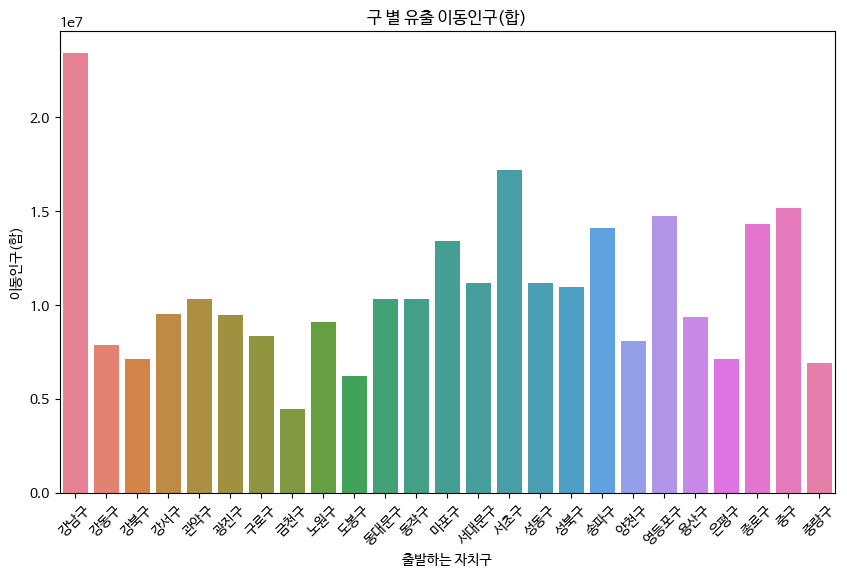

In [ ]:
plt.figure(figsize = (10,6))

sns.barplot(x = '출발 시군구 코드', y = '이동인구(합)', hue = '출발 시군구 코드', data = data1)

plt.title('구 별 유출 이동인구(합)')
plt.xlabel('출발하는 자치구')
plt.ylabel('이동인구(합)')

plt.xticks(rotation = 45)
plt.show()

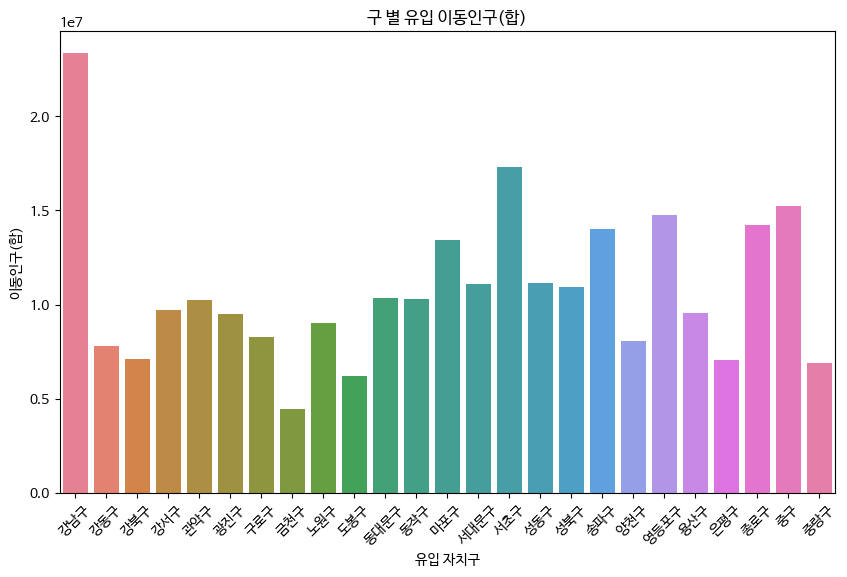

In [ ]:
plt.figure(figsize = (10,6))

sns.barplot(x = '도착 시군구 코드', y = '이동인구(합)', hue = '도착 시군구 코드', data = data2)

plt.title('구 별 유입 이동인구(합)')
plt.xlabel('유입 자치구')
plt.ylabel('이동인구(합)')

plt.xticks(rotation = 45)
plt.show()

 - 유출인구 가장 많은 구 : 강남구
 - 유출인구 가장 적은 구 : 금천구
 - 유입인구 가장 많은 구 : 강남구
 - 유입인구 가장 적은 구 : 금천구

 - 유입 유출이 아닌(특정 구 에서 다른 구로 이동) 전체 이동량 확인

In [ ]:
data3 = seoul_location.groupby('출발 시군구 코드', as_index = False)[['이동인구(합)']].sum()
data4 = seoul_location.groupby('도착 시군구 코드', as_index = False)[['이동인구(합)']].sum()

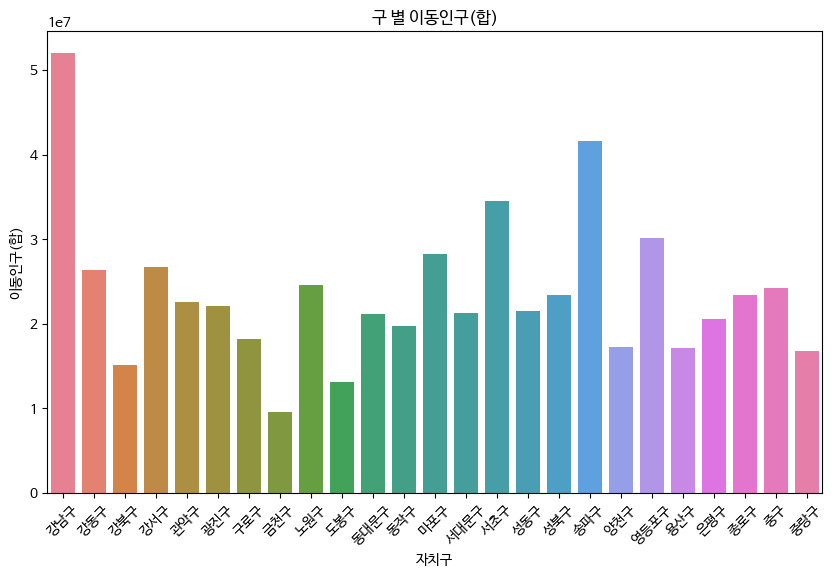

In [ ]:
plt.figure(figsize = (10,6))

sns.barplot(x = '출발 시군구 코드', y = '이동인구(합)', hue = '출발 시군구 코드', data = data3)

plt.title('구 별 이동인구(합)')
plt.xlabel('자치구')
plt.ylabel('이동인구(합)')

plt.xticks(rotation = 45)
plt.show()

위의 결과와 같은 결과가 나왔다. 이유 분석 필요

### 도착시간 00시 ~ 04:59까지 제거 후 구 별 유동인구 확인

In [ ]:
seoul_day = seoul_location.loc[seoul_location['도착시간'].between(5,23)]
seoul_day['도착시간'].value_counts()

도착시간
17    661385
18    653409
16    644646
15    626360
14    617979
19    614186
13    610958
12    583654
20    551193
11    548010
10    521500
21    504011
9     498549
8     462851
22    454680
7     393567
23    383708
6     337326
5     248186
Name: count, dtype: int64

### 도착시간을 기준으로 필터링 했으므로 도착시간을 기준으로 각 구별 평균 이동 시간, 이동인구 확인

In [ ]:
seoul_day_mean = seoul_day.groupby('도착 시군구 코드', as_index = False)[['평균 이동 시간(분)', '이동인구(합)']].mean()
seoul_day_mean

,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,강남구,65.940647,99.458140
1,강동구,71.978746,74.129506
2,강북구,66.585052,43.715662
3,강서구,70.514815,66.818892
4,관악구,63.976539,55.111485
5,광진구,62.797503,52.666295
6,구로구,64.804193,47.957776
7,금천구,67.034597,33.897659
8,노원구,67.752162,61.646233
9,도봉구,67.901386,42.533105


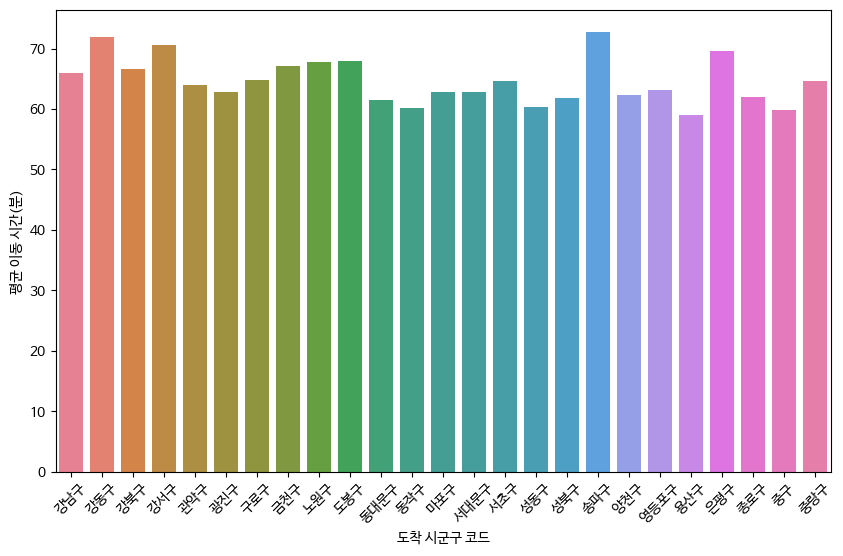

In [ ]:
plt.figure(figsize = (10, 6))
sns.barplot(x = '도착 시군구 코드', y = '평균 이동 시간(분)', hue = '도착 시군구 코드', data = seoul_day_mean)
plt.xticks(rotation = 45)
plt.show()

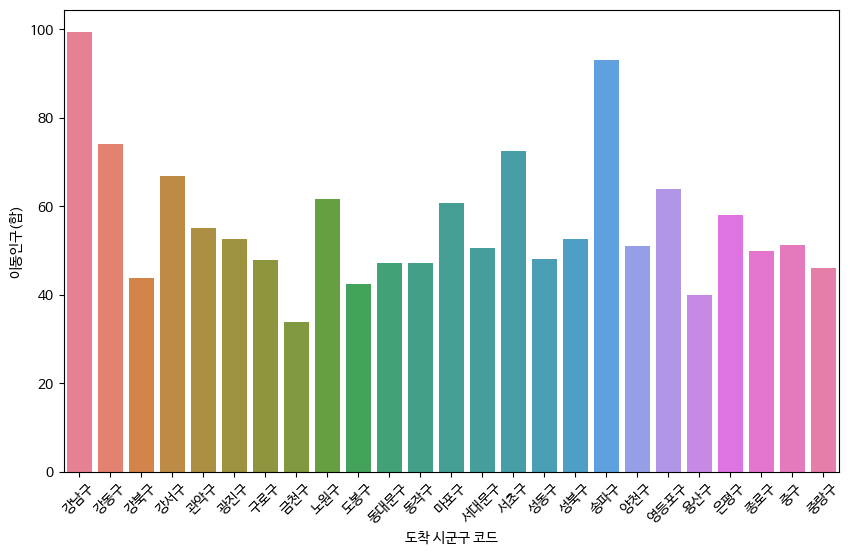

In [ ]:
plt.figure(figsize = (10, 6))
sns.barplot(x = '도착 시군구 코드', y = '이동인구(합)', hue = '도착 시군구 코드', data = seoul_day_mean)
plt.xticks(rotation = 45)
plt.show()

- 평균 이동시간, 이동인구(합), 총 이동 시간, 총 이동인구를 가지고 있는 데이터 생성

In [ ]:
seoul_day_sum = seoul_day.groupby('도착 시군구 코드', as_index = False)[['평균 이동 시간(분)', '이동인구(합)']].sum()
seoul_day_sum = seoul_day_sum.rename(columns = {'평균 이동 시간(분)':'총 이동 시간(분)', '이동인구(합)':'총 이동인구'})
seoul_day_sum

,도착 시군구 코드,총 이동 시간(분),총 이동인구
0,강남구,33408433,50389869.84
1,강동구,24593410,25328273.02
2,강북구,22014483,14453359.71
3,강서구,27346139,25912833.88
4,관악구,24864482,21419078.82
5,광진구,25243089,21170586.64
6,구로구,23730518,17561561.94
7,금천구,18213233,9209960.12
8,노원구,26060937,23712285.19
9,도봉구,20089440,12583929.39


In [ ]:
df2 = pd.merge(seoul_day_mean, seoul_day_sum, on = '도착 시군구 코드', how = 'inner')
df2

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간(분),총 이동인구
0,강남구,65.940647,99.458140,33408433,50389869.84
1,강동구,71.978746,74.129506,24593410,25328273.02
2,강북구,66.585052,43.715662,22014483,14453359.71
3,강서구,70.514815,66.818892,27346139,25912833.88
4,관악구,63.976539,55.111485,24864482,21419078.82
5,광진구,62.797503,52.666295,25243089,21170586.64
6,구로구,64.804193,47.957776,23730518,17561561.94
7,금천구,67.034597,33.897659,18213233,9209960.12
8,노원구,67.752162,61.646233,26060937,23712285.19
9,도봉구,67.901386,42.533105,20089440,12583929.39


**요일 별 평균 이동시간과 이동인구의 합 확인 및 시각화**

In [ ]:
seoul_location

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202404,일,13,종로구,종로구,F,0,EE,35,2153.27
1,202404,일,13,종로구,종로구,F,0,EH,8,55.91
2,202404,일,13,종로구,종로구,F,0,HE,55,422.22
3,202404,일,13,종로구,종로구,F,0,HH,49,110.49
4,202404,일,13,종로구,종로구,F,0,HW,55,139.42
...,...,...,...,...,...,...,...,...,...,...
30606095,202404,토,6,강동구,강동구,M,80,HH,7,18.86
30606096,202404,토,6,강동구,강동구,M,80,HW,34,217.65
30606097,202404,토,6,강동구,강동구,M,80,WE,30,37.79
30606098,202404,토,6,강동구,강동구,M,80,WH,39,113.60


In [ ]:
seoul_week = seoul_location.groupby('요일', as_index = False)[['이동인구(합)', '평균 이동 시간(분)']].sum()
seoul_week

,요일,이동인구(합),평균 이동 시간(분)
0,금,8.685555e+07,107383617
1,목,8.387921e+07,103310843
2,수,7.880880e+07,102111030
3,월,1.014532e+08,105906641
4,일,6.270085e+07,86444878
5,토,7.224479e+07,100449775
6,화,1.051839e+08,111557436


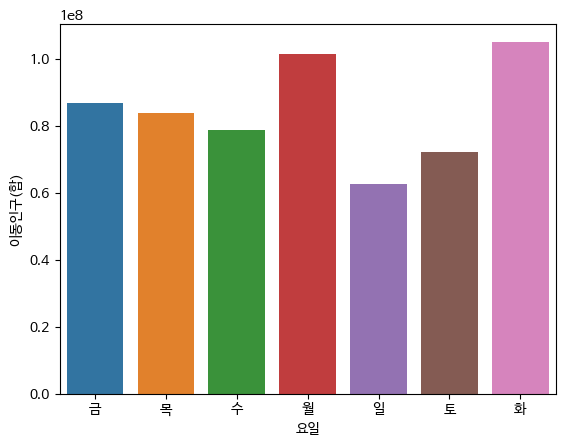

In [ ]:
sns.barplot(x = '요일', y = '이동인구(합)', hue = '요일', data = seoul_week)
plt.show()
##월요일과 화요일의 이동인구가 가장 많음. 토요일과 일요일은 평일에 비해 적은 이동인구 가지고 있음.

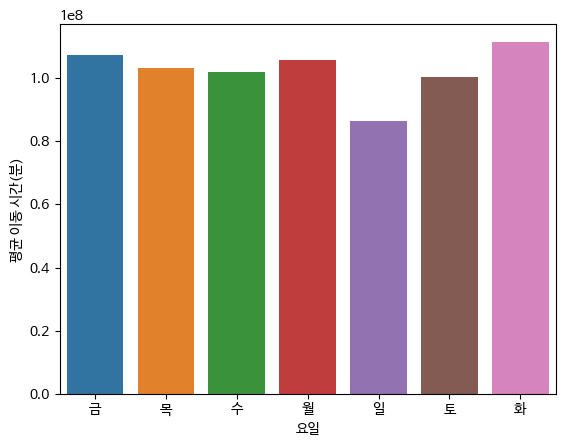

In [ ]:
sns.barplot(x = '요일', y = '평균 이동 시간(분)', hue = '요일', data = seoul_week)
plt.show()
#일요일 평균 이동 시간 현저히 적음 나머지는 비슷한 평균 이동시간을 가지고 있다.

In [ ]:
seoul_night = seoul_location.loc[seoul_location['도착시간'].between(0, 5)]
seoul_night

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
3723021,202404,일,3,종로구,종로구,F,10,WH,29,5.90
3723022,202404,일,3,종로구,종로구,F,15,EE,28,4.09
3723023,202404,일,3,종로구,종로구,F,15,EH,43,18.28
3723024,202404,일,3,종로구,종로구,F,15,HH,41,20.16
3723025,202404,일,3,종로구,종로구,F,15,WH,22,12.10
...,...,...,...,...,...,...,...,...,...,...
23750659,202404,토,4,강동구,강동구,M,80,HH,20,18.95
23750660,202404,토,4,강동구,강동구,M,80,HW,5,18.92
23750661,202404,토,4,강동구,강동구,M,80,WE,58,19.04
23750662,202404,토,4,강동구,강동구,M,80,WH,22,28.38


In [ ]:
seoul_night['도착시간'].value_counts()

도착시간
0    326712
5    248186
1    244871
2    205835
4    190494
3    182089
Name: count, dtype: int64

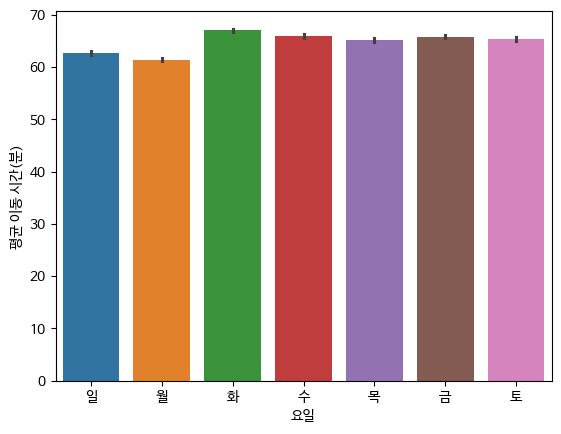

In [ ]:
## 심야시간 요일별 평균 이동시간 시각화

sns.barplot(x = '요일', y = '평균 이동 시간(분)', hue = '요일', data = seoul_night)
plt.show()

#요일별 심야시간 평균 이동시간은 큰 차이를 보이지 않는다. 다만 주말에 평균이동시간이 늘어났다.

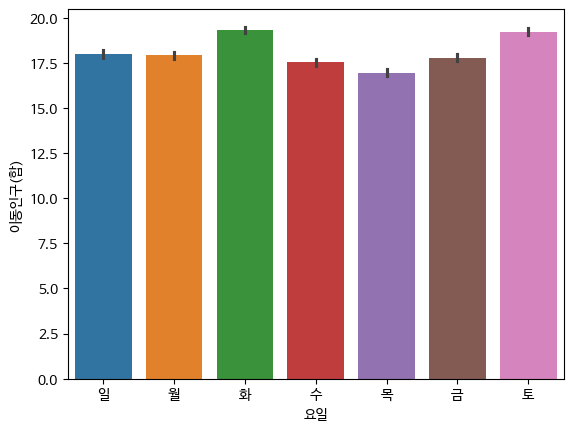

In [ ]:
#심야시간 요일별 이동인구 시각화

sns.barplot(x = '요일', y = '이동인구(합)', hue = '요일', data = seoul_night)
plt.show()

## 심야시간 요일별 이동인구 또한 큰 차이를 보이지 않는다. 위와 비슷하게 주말의 이동인구가 심야시간엔 높다는것을 알 수 있다. -> 약속 등 사적인 일정을 마치고 심야시간에 들어가는 경우라고 생각됨.

 - 도착시간을 더 세분화

  ** 출근시간, 주중시간, 퇴근시간으로 구분**
   - 출근시간 (06:00 ~ 10:59), 주중시간(11:00~16:59), 퇴근시간(17:00 ~ 23:59)로 지정 (도착시간을 기준)

In [ ]:
seoul_morning = seoul_location.loc[seoul_location['도착시간'].between(6, 10)]
seoul_daytime = seoul_location.loc[seoul_location['도착시간'].between(11, 16)]
seoul_leave_work = seoul_location.loc[seoul_location['도착시간'].between(17, 23)]

In [ ]:
print(seoul_morning['도착시간'].value_counts())
print('*' * 80)
print(seoul_daytime['도착시간'].value_counts())
print('*' * 80)
print(seoul_leave_work['도착시간'].value_counts())

도착시간
10    521500
9     498549
8     462851
7     393567
6     337326
Name: count, dtype: int64
********************************************************************************
도착시간
16    644646
15    626360
14    617979
13    610958
12    583654
11    548010
Name: count, dtype: int64
********************************************************************************
도착시간
17    661385
18    653409
19    614186
20    551193
21    504011
22    454680
23    383708
Name: count, dtype: int64


### 1) 출근시간 기준으로 필터링한 데이터를 가지고 요일 별 평균 이동시간, 이동인구 / 자치구 별 평균 이동시간, 이동인구 확인

In [ ]:
seoul_morning_weekday = seoul_morning.groupby('요일', as_index = False)[['평균 이동 시간(분)', '이동인구(합)']].sum()
seoul_morning_gu = seoul_morning.groupby('도착 시군구 코드', as_index = False)[['평균 이동 시간(분)', '이동인구(합)']].sum() #출근시간 구 별 평균 이동시간과 이동인구(합) 도착시간에 따른 필터링 했으므로 도착시군구 기준으로

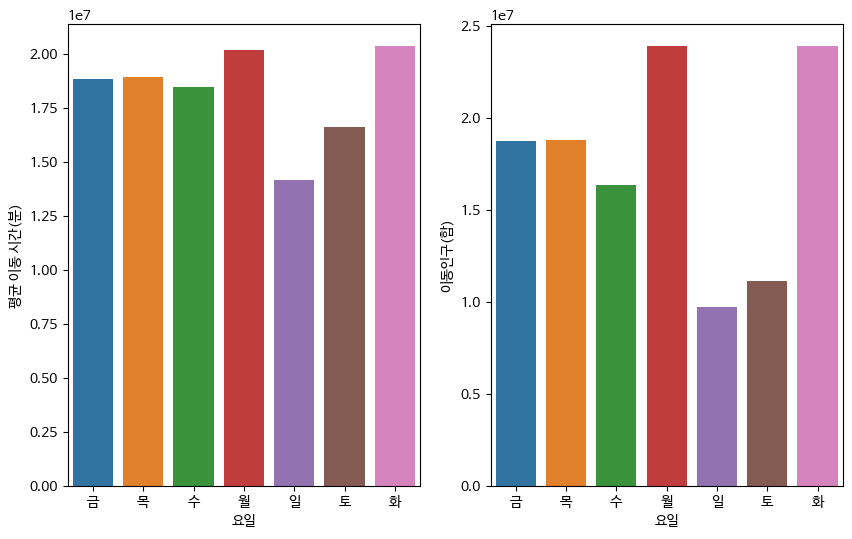

In [ ]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
sns.barplot(x = '요일', y = '평균 이동 시간(분)', hue = '요일', data = seoul_morning_weekday)

plt.subplot(1,2,2)
sns.barplot(x = '요일', y = '이동인구(합)', hue = '요일', data = seoul_morning_weekday)

plt.show()

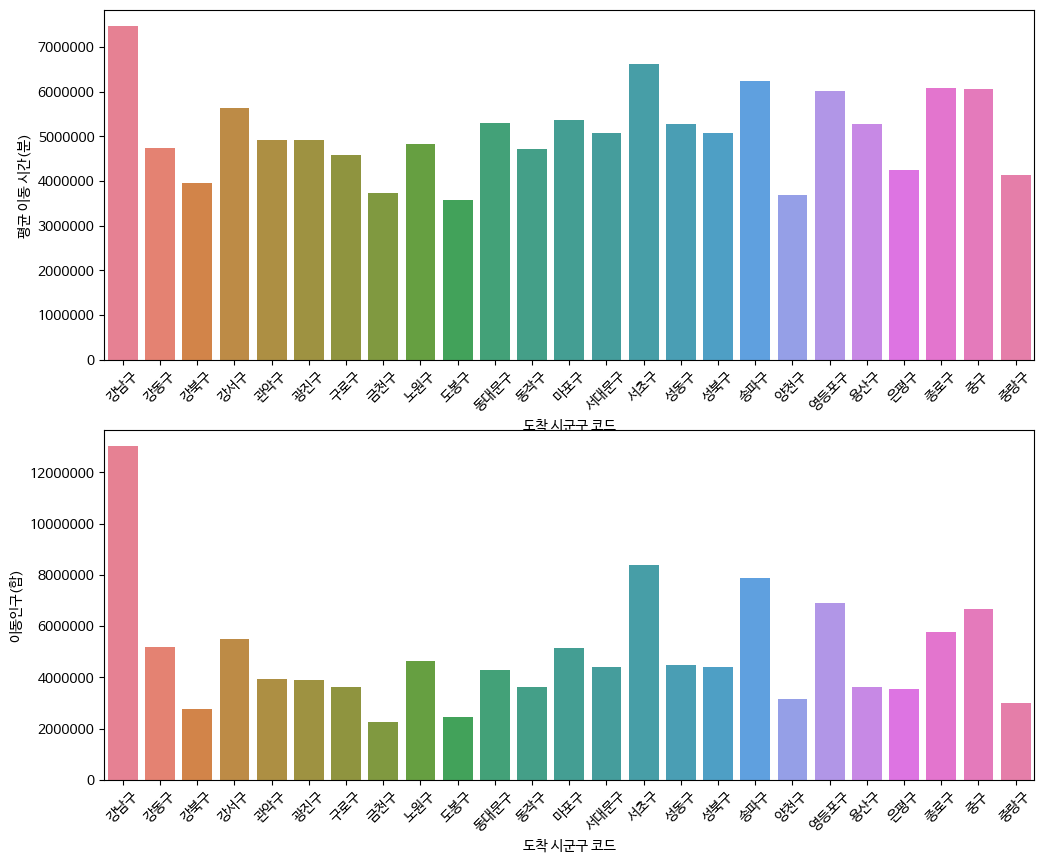

In [ ]:
plt.figure(figsize = (12,10))

plt.subplot(2,1,1)
sns.barplot(x = '도착 시군구 코드', y = '평균 이동 시간(분)', hue = '도착 시군구 코드', data = seoul_morning_gu)
plt.xticks(rotation =45)
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')

plt.subplot(2,1,2)
sns.barplot(x = '도착 시군구 코드', y = '이동인구(합)', hue = '도착 시군구 코드', data = seoul_morning_gu)
plt.xticks(rotation =45)
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')

plt.show()

### 1. 도착 자치구에 따른 평균이동시간 차이

- 강남구, 서초구, 송파구인 강남 3구로 도착하는 평균이동시간이 가장 길다. 다른 구에서 강남 3구로 출근하는 사람들 많다고 추측.
- 전체 데이터와 다르게 종로구와 중구, 영등포구로 이동하는 평균이동시간도 출근시간에 매우 길다는 것을 확인 -> 오피스들이 몰려있는 지역들로서 다른구에서 회사로 출근하는 사람들이라고 추측.
- 금천, 도봉, 양천구 평균 이동시간 매우 적음. 애초에 상업지구도 아닐 뿐만 아니라 거주지역으로 근처에서 이동하지 않을까 추측.

### 2. 도착 자치구에 따른 이동인구의 차이
 - 위의 평균 이동시간과 거의 비슷한 추세. 강남 3구 + 상업지구인 종로, 중구, 영등포구로 도착하는 이동인구 많음.
 - 금천, 양천, 도봉, 강북 이동인구 적음.
 - 자치구 별로 이동인구의 차이는 있다.

 ### 특이점
 - 용산구는 평균 이동시간은 긴데 이동인구는 적음. ->  용산구와 거리가 떨어진 곳에서 오는 사람들이 많다고 판단.

### 2) 주중시간을 기준으로 필터링 후 요일 별 평균 이동시간, 이동인구 / 자치구 별 평균 이동시간, 이동인구 확인

In [ ]:
seoul_daytime_weekday = seoul_daytime.groupby('요일', as_index = False)[['평균 이동 시간(분)', '이동인구(합)']].sum()
seoul_daytime_gu = seoul_daytime.groupby('도착 시군구 코드', as_index = False)[['평균 이동 시간(분)', '이동인구(합)']].sum() #주중시간 구 별 평균 이동시간과 이동인구(합) 도착시간에 따른 필터링 했으므로 도착시군구 기준으로

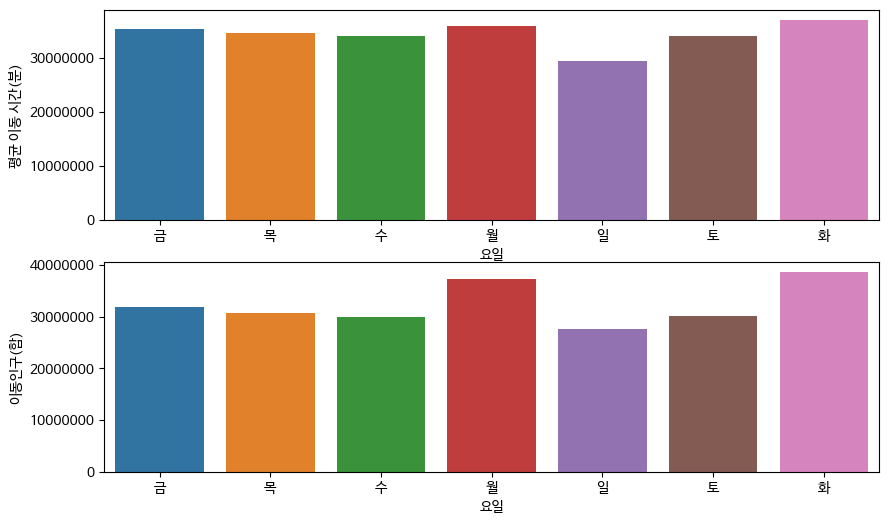

In [ ]:
plt.figure(figsize = (10,6))

plt.subplot(2,1,1)
sns.barplot(x = '요일', y = '평균 이동 시간(분)', hue = '요일', data = seoul_daytime_weekday)
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')

plt.subplot(2,1,2)
sns.barplot(x = '요일', y = '이동인구(합)', hue = '요일', data = seoul_daytime_weekday)
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')

plt.show()

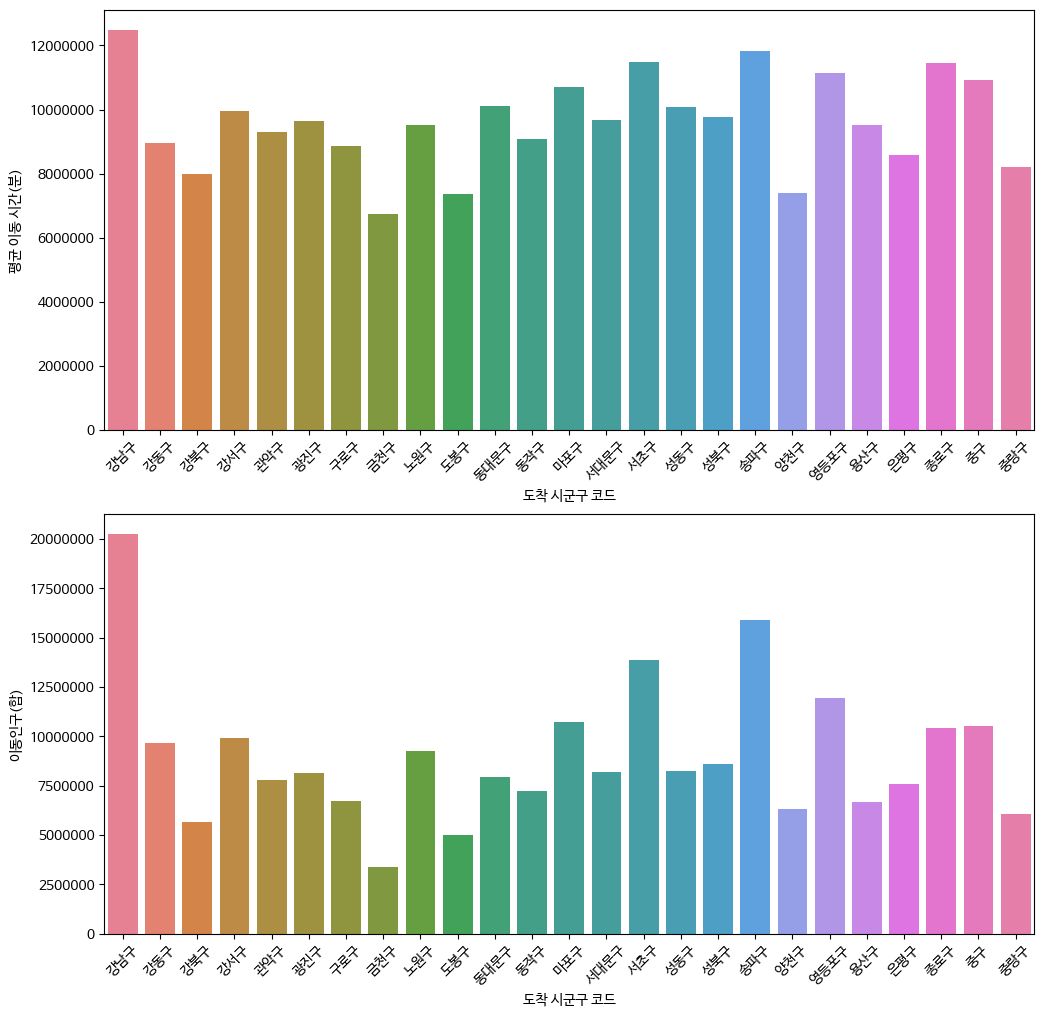

In [ ]:
plt.figure(figsize = (12,12))

plt.subplot(2,1,1)
sns.barplot(x = '도착 시군구 코드', y = '평균 이동 시간(분)', hue = '도착 시군구 코드', data = seoul_daytime_gu)
plt.xticks(rotation =45)
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')

plt.subplot(2,1,2)
sns.barplot(x = '도착 시군구 코드', y = '이동인구(합)', hue = '도착 시군구 코드', data = seoul_daytime_gu)
plt.xticks(rotation =45)
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')

plt.show()

- 평균 이동시간과 이동인구 추세는 출근시간과 거의 비슷함. 다만 시간지정 Window가 크기때문에 단위가 주중시간이 더 크다.

### 2) 퇴근시간을 기준으로 필터링 후 요일 별 평균 이동시간, 이동인구 / 자치구 별 평균 이동시간, 이동인구 확인

In [ ]:
seoul_leavework_weekday = seoul_leave_work.groupby('요일', as_index = False)[['평균 이동 시간(분)', '이동인구(합)']].sum()
seoul_leavework_gu = seoul_leave_work.groupby('도착 시군구 코드', as_index = False)[['평균 이동 시간(분)', '이동인구(합)']].sum() #출근시간 구 별 평균 이동시간과 이동인구(합) 도착시간에 따른 필터링 했으므로 도착시군구 기준으로

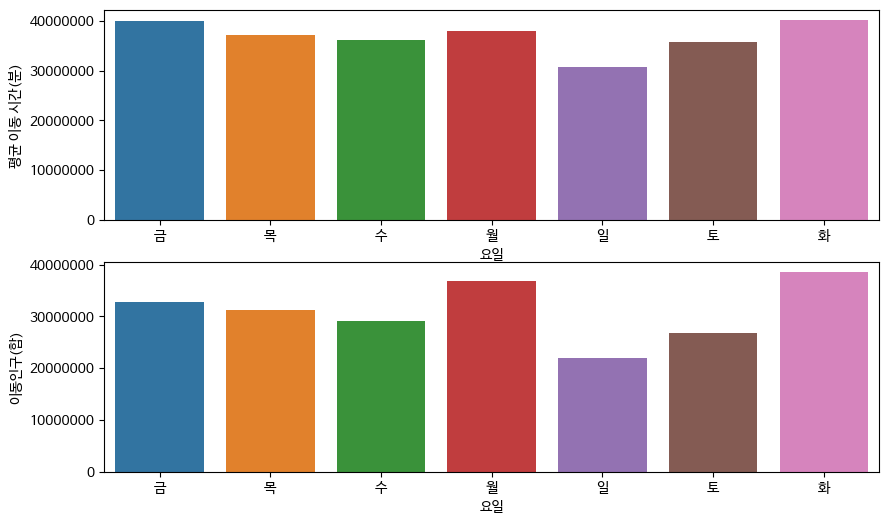

In [ ]:
plt.figure(figsize = (10,6))

plt.subplot(2,1,1)
sns.barplot(x = '요일', y = '평균 이동 시간(분)', hue = '요일', data = seoul_leavework_weekday)
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')

plt.subplot(2,1,2)
sns.barplot(x = '요일', y = '이동인구(합)', hue = '요일', data = seoul_leavework_weekday)
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')

plt.show()

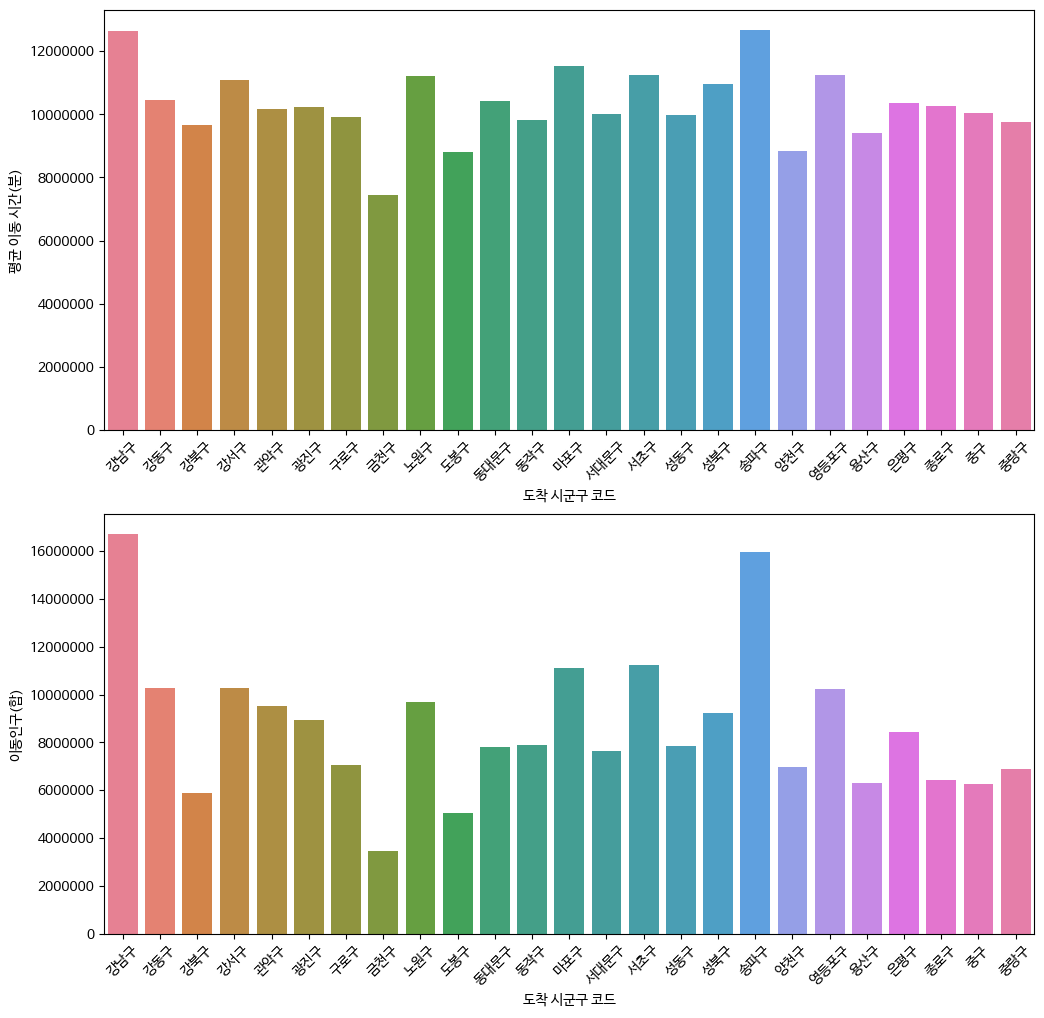

In [ ]:
plt.figure(figsize = (12,12))

plt.subplot(2,1,1)
sns.barplot(x = '도착 시군구 코드', y = '평균 이동 시간(분)', hue = '도착 시군구 코드', data = seoul_leavework_gu)
plt.xticks(rotation =45)
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')

plt.subplot(2,1,2)
sns.barplot(x = '도착 시군구 코드', y = '이동인구(합)', hue = '도착 시군구 코드', data = seoul_leavework_gu)
plt.xticks(rotation =45)
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')

plt.show()

### 시간대 별 이동유형의 차이 비교 분석


 ##### 1) 출근시간대 어떤 이동유형이 많을까? (ex. 집에서 회사로 가는 EW가 가장 많지 않을까 예상)

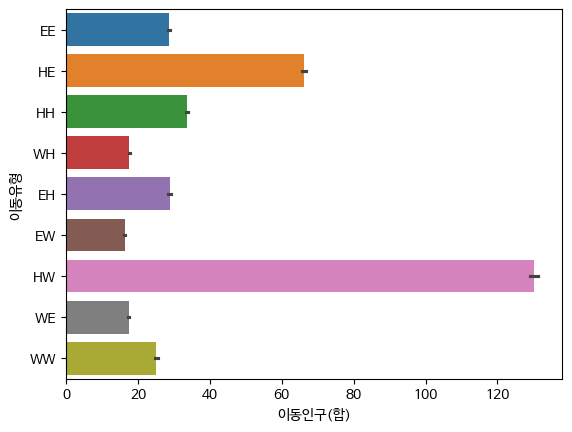

In [ ]:
sns.barplot(x = '이동인구(합)', y = '이동유형', hue = '이동유형', data = seoul_morning)
plt.show()

 - 앞에서 예상했던것과 동일하게 출근시간대에 집에서 회사로(HW), 집에서 기타장소로(HE)가 가장 많다.
 - 즉, 이동유형에 따른 이동인구는 차이가 있다.

#### 2)주중시간대엔 어떤 이동유형이 가장 많을까?
 (ex. 이동유형간 이동인구의 차이가 크지 않을것으로 예상. 집으로 돌아가는 유형이 많을것)

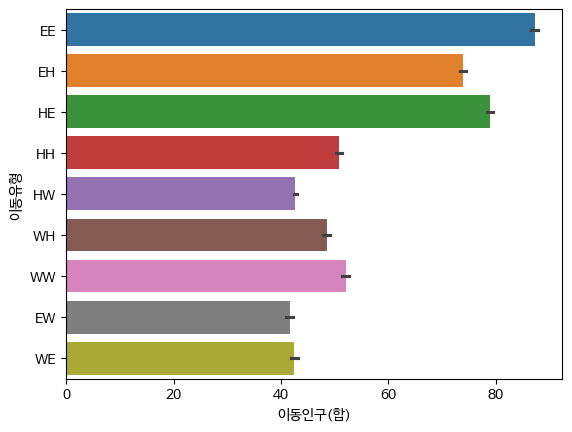

In [ ]:
sns.barplot(x = '이동인구(합)', y = '이동유형', hue = '이동유형', data = seoul_daytime)
plt.show()

- 예상한것처럼 기타장소에서 집으로 돌아가는 유형도 많지만 기타지역에서 기타지역으로 가는 비중이 가장 높다.

#### 2)퇴근시간대엔 어떤 이동유형이 가장 많을까?
 - 직장혹은 학교에서 집으로 가거나 기타장소에서 집으로가는 유형이 가장 많을것으로 생각됨.

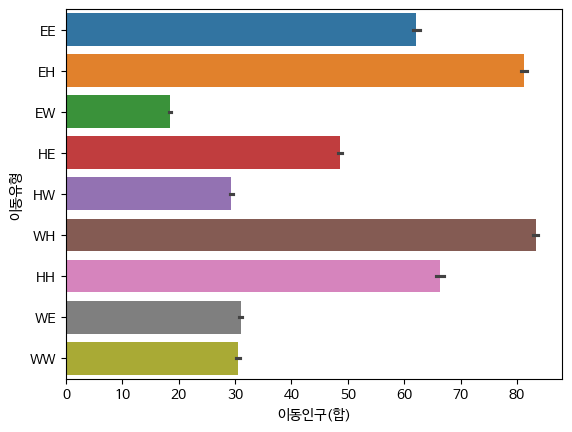

In [ ]:
sns.barplot(x = '이동인구(합)', y = '이동유형', hue = '이동유형', data = seoul_leave_work)
plt.show()

- 예상과 비슷하게 주간상주지나 기타장소에서 집으로 가는 비중이 큼.
- 주간상주지(W)나 야간상주지(H) 가아닌 기타장소에서 기타장소로 가는 비중도 크다.